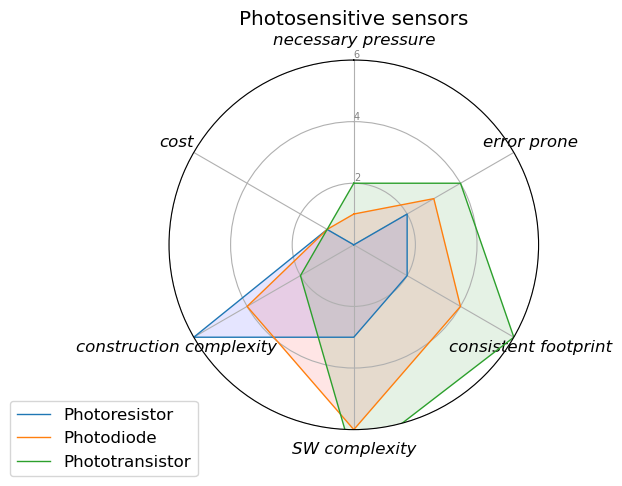

In [22]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

plt.rcParams.update({'font.size': 12})

# Set data
df = pd.DataFrame({
'group': ['Photoresistor','Photodiode','Phototransistor'],
'necessary pressure': [0,1,2],
'error prone': [2,3,4],
'consistent footprint': [2,4,6],
'SW complexity': [3,6,7],
'construction complexity': [6,4,2],
'cost': [1,1,1]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories,  fontstyle='italic')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
plt.ylim(0,6)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Photoresistor")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Photodiode")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Phototransistor")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Photosensitive sensors")

# Show the graph
plt.show()

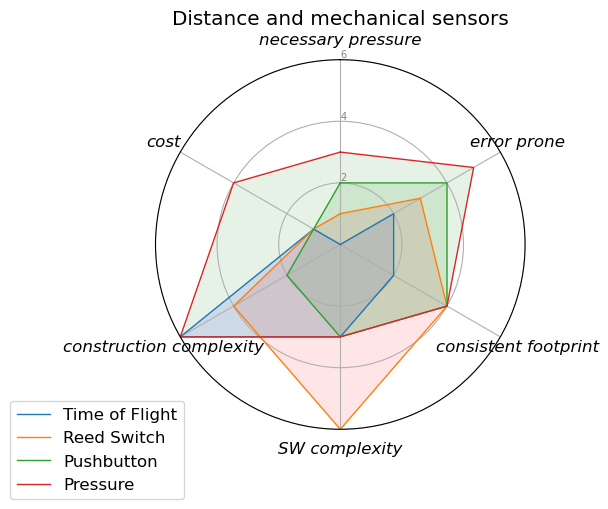

In [23]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Time of Flight','Reed Switch','Pushbutton', 'Pressure'],
'necessary pressure': [0,1,2,3],
'error prone': [2,3,4,5],
'consistent footprint': [2,4,4,4],
'SW complexity': [3,6,3,3],
'construction complexity': [6,4,2,6],
'cost': [1,1,1,4]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, fontstyle='italic')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
plt.ylim(0,6)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Time of Flight")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Reed Switch")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Pushbutton")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Pressure")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Distance and mechanical sensors")

# Show the graph
plt.show()

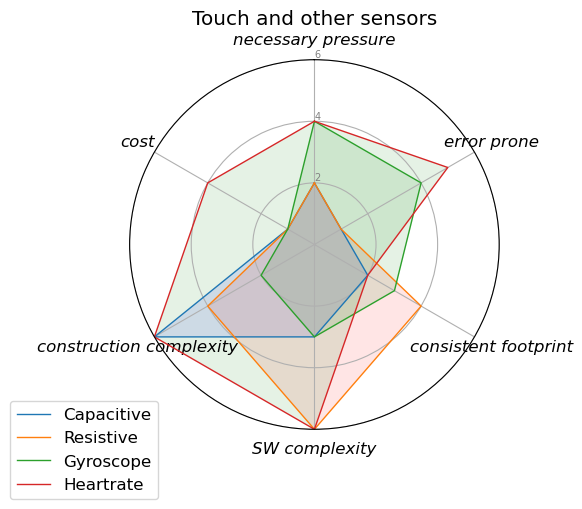

In [25]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['Capacitive','Resistive','Gyroscope', 'Heartrate'],
'necessary pressure': [2,2,4,4],
'error prone': [1,1,4,5],
'consistent footprint': [2,4,3,2],
'SW complexity': [3,6,3,6],
'construction complexity': [6,4,2,6],
'cost': [1,1,1,4]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, fontstyle='italic')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6], ["2","4","6"], color="grey", size=7)
plt.ylim(0,6)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Capacitive")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Resistive")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Gyroscope")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind4
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Heartrate")
ax.fill(angles, values, 'g', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Touch and other sensors")

# Show the graph
plt.show()